In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer

%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette('magma')

In [3]:
df = pd.read_csv('Datasets/us_ev_parking.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1869 entries, 0 to 1868
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   zip               1868 non-null   float64
 1   facility_type     1850 non-null   object 
 2   ev_slow           1834 non-null   float64
 3   ev_dc_fast_count  1834 non-null   float64
 4   spaces            254 non-null    float64
dtypes: float64(4), object(1)
memory usage: 73.1+ KB


In [5]:
df.dropna(subset=['zip'], axis = 0, inplace = True)

In [6]:
df['zip'] = df['zip'].astype(int)

In [7]:
df = df.set_index('zip', drop = True)

In [8]:
df.isnull().sum()

facility_type         18
ev_slow               34
ev_dc_fast_count      34
spaces              1615
dtype: int64

In [9]:
df.dropna(subset = ['facility_type', 'ev_slow'], axis = 0, inplace = True)

In [10]:
df.isnull().sum()

facility_type          0
ev_slow                0
ev_dc_fast_count       0
spaces              1615
dtype: int64

In [11]:
df = df.applymap(lambda x: x.lower() if type(x) == str else x)

In [12]:
df.replace(' ', '_', regex = True, inplace = True)

<AxesSubplot:>

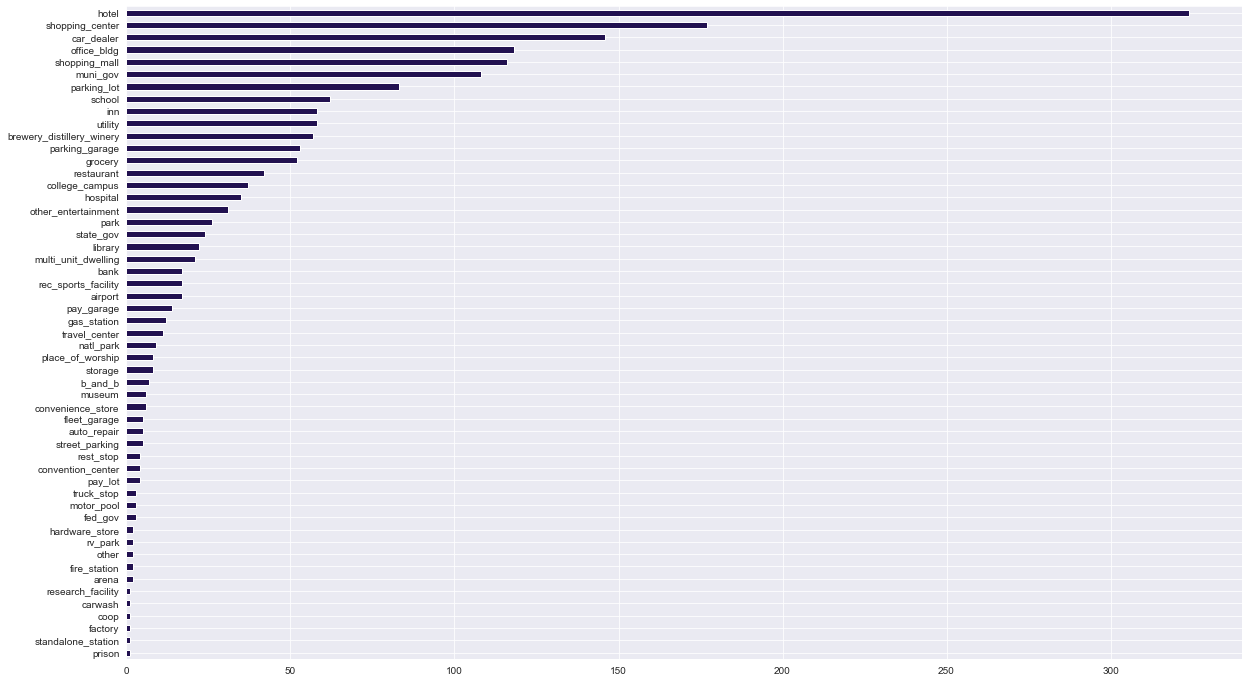

In [13]:
plt.figure(figsize = (20,12))
df['facility_type'].value_counts(ascending=True).plot(kind = 'barh')

In [14]:
df['facility_type'].unique()

array(['storage', 'street_parking', 'utility', 'college_campus', 'museum',
       'office_bldg', 'parking_garage', 'hotel', 'parking_lot',
       'pay_garage', 'bank', 'car_dealer', 'hospital', 'shopping_mall',
       'restaurant', 'muni_gov', 'multi_unit_dwelling',
       'other_entertainment', 'standalone_station', 'shopping_center',
       'state_gov', 'airport', 'grocery', 'park', 'prison', 'auto_repair',
       'rec_sports_facility', 'school', 'gas_station', 'pay_lot',
       'convenience_store', 'fleet_garage', 'library',
       'convention_center', 'hardware_store', 'natl_park', 'carwash',
       'rv_park', 'fire_station', 'arena', 'inn', 'travel_center',
       'brewery_distillery_winery', 'other', 'place_of_worship',
       'research_facility', 'motor_pool', 'rest_stop', 'factory',
       'truck_stop', 'b_and_b', 'fed_gov', 'coop'], dtype=object)

In [15]:
df.facility_type = df.facility_type.map({'storage': 'others',
                                         'street_parking': 'parking_lot',
                                         'utility': 'government',
                                         'college_campus': 'school', 
                                         'museum': 'landmarks',
                                         'office_bldg': 'office', 
                                         'parking_garage': 'parking_lot', 
                                         'hotel': 'hotel', 
                                         'parking_lot': 'parking_lot',
                                         'pay_garage': 'parking_lot', 
                                         'bank': 'office', 
                                         'car_dealer': 'car_dealer', 
                                         'hospital': 'hospital', 
                                         'shopping_mall': 'shopping_mall',
                                         'restaurant': 'restaurant', 
                                         'muni_gov': 'parking_lot', 
                                         'multi_unit_dwelling': 'parking_lot',
                                         'other_entertainment': 'others', 
                                         'standalone_station': 'gas_station', 
                                         'shopping_center': 'shopping_mall',
                                         'state_gov': 'government', 
                                         'airport': 'airport', 
                                         'grocery': 'others', 
                                         'park': 'landmarks', 
                                         'prison': 'others', 
                                         'auto_repair': 'others',
                                         'rec_sports_facility': 'others', 
                                         'school': 'school', 
                                         'gas_station': 'gas_station', 
                                         'pay_lot': 'parking_lot', 
                                         'convenience_store': 'others', 
                                         'fleet_garage': 'others', 
                                         'library': 'others',
                                         'convention_center': 'others', 
                                         'hardware_store': 'shopping_mall', 
                                         'natl_park' : 'landmarks', 
                                         'carwash': 'others',
                                         'rv_park': 'others', 
                                         'fire_station': 'others', 
                                         'arena': 'landmarks', 
                                         'inn': 'hotel', 
                                         'travel_center': 'others',
                                         'brewery_distillery_winery': 'landmarks', 
                                         'other': 'others', 
                                         'place_of_worship': 'landmarks',
                                         'research_facility': 'others', 
                                         'motor_pool': 'others', 
                                         'rest_stop': 'gas_station', 
                                         'factory': 'others',
                                         'truck_stop': 'others', 
                                         'b_and_b' : 'parking_lot', 
                                         'fed_gov': 'government', 
                                         'coop': 'others'
                                        }
                                       )

hotel            382
shopping_mall    295
parking_lot      295
others           178
car_dealer       146
office           135
landmarks        108
school            99
government        85
restaurant        42
hospital          35
airport           17
gas_station       17
Name: facility_type, dtype: int64


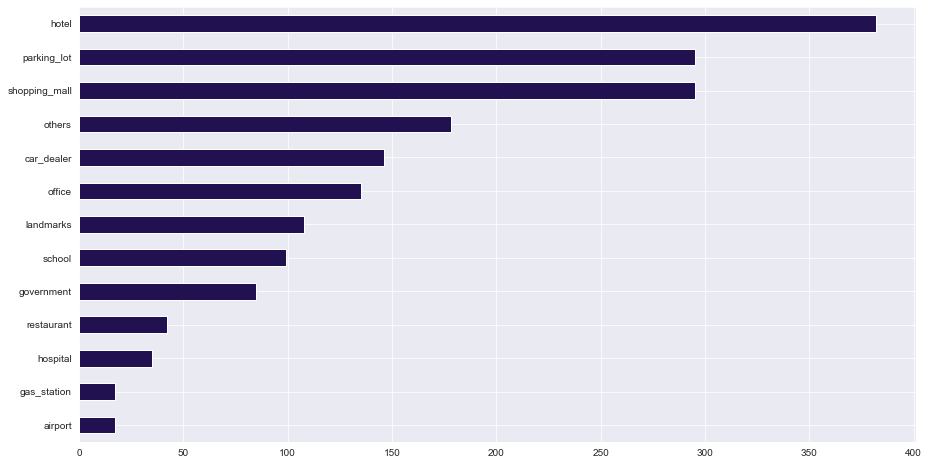

In [16]:
plt.figure(figsize = (15,8))
df['facility_type'].value_counts(ascending=True).plot(kind = 'barh')
print(df['facility_type'].value_counts())

In [17]:
df.rename(columns = {'ev_dc_fast_count': 'ev_fast'}, inplace=True)

In [18]:
df.head()

,facility_type,ev_slow,ev_fast,spaces
zip,,,,
90001,others,1.0,0.0,NaN
90002,parking_lot,1.0,0.0,NaN
90003,government,2.0,0.0,61.0
90003,government,2.0,0.0,21.0
90003,government,2.0,0.0,64.0


In [19]:
df1 = pd.get_dummies(df, columns = ['facility_type'])

In [20]:
df1.head()

,ev_slow,ev_fast,spaces,facility_type_airport,facility_type_car_dealer,facility_type_gas_station,facility_type_government,facility_type_hospital,facility_type_hotel,facility_type_landmarks,facility_type_office,facility_type_others,facility_type_parking_lot,facility_type_restaurant,facility_type_school,facility_type_shopping_mall
zip,,,,,,,,,,,,,,,,
90001,1.0,0.0,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0
90002,1.0,0.0,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0
90003,2.0,0.0,61.0,0,0,0,1,0,0,0,0,0,0,0,0,0
90003,2.0,0.0,21.0,0,0,0,1,0,0,0,0,0,0,0,0,0
90003,2.0,0.0,64.0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [21]:
df1.isnull().sum()

ev_slow                           0
ev_fast                           0
spaces                         1615
facility_type_airport             0
facility_type_car_dealer          0
facility_type_gas_station         0
facility_type_government          0
facility_type_hospital            0
facility_type_hotel               0
facility_type_landmarks           0
facility_type_office              0
facility_type_others              0
facility_type_parking_lot         0
facility_type_restaurant          0
facility_type_school              0
facility_type_shopping_mall       0
dtype: int64

In [22]:
knn_imp = KNNImputer(n_neighbors = 5, weights='uniform', )
knn_imp_parking_missing = knn_imp.fit_transform(df1)

df_imputed = pd.DataFrame(knn_imp_parking_missing, columns = df1.columns)

In [23]:
df_imputed

,ev_slow,ev_fast,spaces,facility_type_airport,facility_type_car_dealer,facility_type_gas_station,facility_type_government,facility_type_hospital,facility_type_hotel,facility_type_landmarks,facility_type_office,facility_type_others,facility_type_parking_lot,facility_type_restaurant,facility_type_school,facility_type_shopping_mall
0,1.0,0.0,264.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,3408.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2.0,0.0,61.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,21.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,64.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,7.0,0.0,229.8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1830,1.0,0.0,201.4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1831,2.0,0.0,54.6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1832,3.0,0.0,4397.8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df_imputed['spaces'] = df_imputed['spaces'].apply(np.ceil)

In [25]:
df['spaces'] = df_imputed['spaces'].values

In [26]:
df.head()

,facility_type,ev_slow,ev_fast,spaces
zip,,,,
90001,others,1.0,0.0,265.0
90002,parking_lot,1.0,0.0,3409.0
90003,government,2.0,0.0,61.0
90003,government,2.0,0.0,21.0
90003,government,2.0,0.0,64.0


<AxesSubplot:xlabel='spaces'>

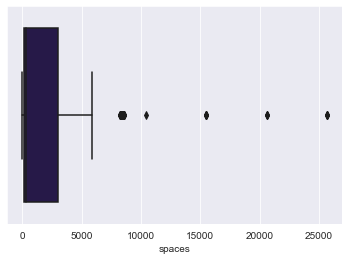

In [27]:
sns.boxplot(x = df['spaces'])

In [28]:
#outlier1 = df[(df['spaces']>5000)].index

In [29]:
#df = df.drop(outlier1, axis = 0)

In [30]:
#sns.boxplot(x = df['spaces'])

In [31]:
df.head()

,facility_type,ev_slow,ev_fast,spaces
zip,,,,
90001,others,1.0,0.0,265.0
90002,parking_lot,1.0,0.0,3409.0
90003,government,2.0,0.0,61.0
90003,government,2.0,0.0,21.0
90003,government,2.0,0.0,64.0


In [32]:
df.shape

(1834, 4)

In [33]:
df = pd.get_dummies(df, columns = ['facility_type'])

In [34]:
df

,ev_slow,ev_fast,spaces,facility_type_airport,facility_type_car_dealer,facility_type_gas_station,facility_type_government,facility_type_hospital,facility_type_hotel,facility_type_landmarks,facility_type_office,facility_type_others,facility_type_parking_lot,facility_type_restaurant,facility_type_school,facility_type_shopping_mall
zip,,,,,,,,,,,,,,,,
90001,1.0,0.0,265.0,0,0,0,0,0,0,0,0,1,0,0,0,0
90002,1.0,0.0,3409.0,0,0,0,0,0,0,0,0,0,1,0,0,0
90003,2.0,0.0,61.0,0,0,0,1,0,0,0,0,0,0,0,0,0
90003,2.0,0.0,21.0,0,0,0,1,0,0,0,0,0,0,0,0,0
90003,2.0,0.0,64.0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99362,7.0,0.0,230.0,0,0,0,0,0,0,1,0,0,0,0,0,0
99362,1.0,0.0,202.0,0,1,0,0,0,0,0,0,0,0,0,0,0
99362,2.0,0.0,55.0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [35]:
df['ev_total'] = df['ev_slow'] + df['ev_fast']

In [36]:
df.head()

,ev_slow,ev_fast,spaces,facility_type_airport,facility_type_car_dealer,facility_type_gas_station,facility_type_government,facility_type_hospital,facility_type_hotel,facility_type_landmarks,facility_type_office,facility_type_others,facility_type_parking_lot,facility_type_restaurant,facility_type_school,facility_type_shopping_mall,ev_total
zip,,,,,,,,,,,,,,,,,
90001,1.0,0.0,265.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0
90002,1.0,0.0,3409.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.0
90003,2.0,0.0,61.0,0,0,0,1,0,0,0,0,0,0,0,0,0,2.0
90003,2.0,0.0,21.0,0,0,0,1,0,0,0,0,0,0,0,0,0,2.0
90003,2.0,0.0,64.0,0,0,0,1,0,0,0,0,0,0,0,0,0,2.0


In [37]:
features = df.drop(columns = ['ev_slow', 'ev_fast', 'ev_total'], axis = 1)

In [38]:
X_slow = features
y_slow = df['ev_slow']

In [39]:
X_train, X_test, y_train, y_test  = train_test_split(X_slow, y_slow, random_state=42)

In [40]:
lr = LinearRegression()

In [41]:
lr.fit(X_train, y_train)
lr.fit(X_test, y_test)

LinearRegression()

In [42]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.055384455348711725
0.13689689715487163


In [43]:
ridge = RidgeCV(alphas = np.linspace(0.1, 10, 100))

In [44]:
ridge.fit(X_train, y_train)
ridge.fit(X_test, y_test)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [45]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.0552727512347958
0.11473782403555055


In [46]:
pred_lr = lr.predict(X_test)

Text(0, 0.5, 'Actual Values')

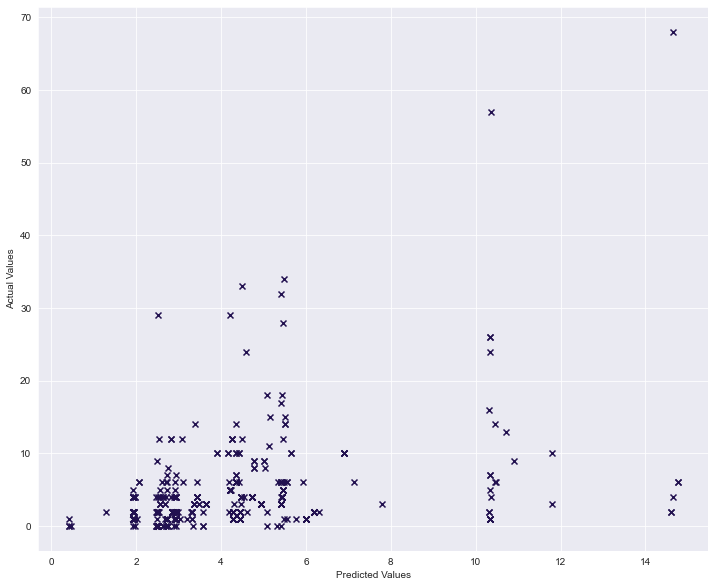

In [47]:
plt.figure(figsize = (12,10))
plt.scatter(pred_lr, y_test, marker = 'x')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [48]:
pipe = Pipeline([('ss', StandardScaler()), ('model', None)])

param_grid = [{'model': [KNeighborsClassifier()],
               'model__p': [1,2,3],
               'model__n_neighbors': [9,11,13, 15, 17],
               'model__weights': ['uniform', 'distance']},
              {'model': [RandomForestClassifier()],
               'model__n_estimators': [5,10,15,20,25,30],
               'model__max_depth': [5,6,7,8,9,10],
               'model__min_samples_split': [2,3,4,5,6,7]}
             ]


In [49]:
gs = GridSearchCV(pipe, param_grid, cv = 5, scoring = 'accuracy')

In [50]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('model', None)]),
             param_grid=[{'model': [KNeighborsClassifier(n_neighbors=13, p=1,
                                                         weights='distance')],
                          'model__n_neighbors': [9, 11, 13, 15, 17],
                          'model__p': [1, 2, 3],
                          'model__weights': ['uniform', 'distance']},
                         {'model': [RandomForestClassifier()],
                          'model__max_depth': [5, 6, 7, 8, 9, 10],
                          'model__min_samples_split': [2, 3, 4, 5, 6, 7],
                          'model__n_estimators': [5, 10, 15, 20, 25, 30]}],
             scoring='accuracy')

In [51]:
gs.best_score_

0.8072727272727273

In [52]:
gs.score(X_test, y_test)

0.8148148148148148

In [53]:
gs.best_estimator_

Pipeline(steps=[('ss', StandardScaler()),
                ('model',
                 KNeighborsClassifier(n_neighbors=13, p=1,
                                      weights='distance'))])

In [54]:
gs.best_params_

{'model': KNeighborsClassifier(n_neighbors=13, p=1, weights='distance'),
 'model__n_neighbors': 13,
 'model__p': 1,
 'model__weights': 'distance'}

In [55]:
pred_gs = gs.predict(X_test)

Text(0, 0.5, 'Actual Values')

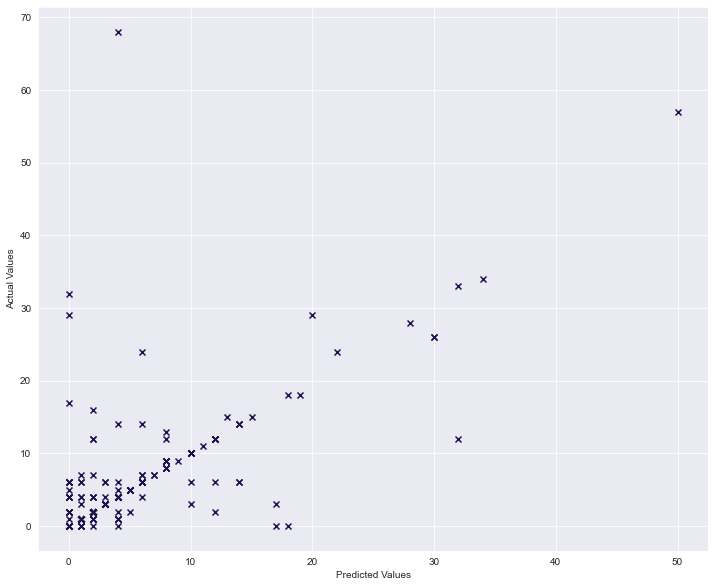

In [56]:
plt.figure(figsize = (12,10))
plt.scatter(pred_gs, y_test, marker = 'x')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [57]:
knn = KNeighborsClassifier(n_neighbors=13, p = 1, weights='distance')

In [58]:
ss = StandardScaler()

In [59]:
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [60]:
knn.fit(X_train_sc, y_train)
y_pred = knn.predict(X_test_sc)
print(accuracy_score(y_test, y_pred))

0.8148148148148148


## Predictions

In [61]:
hdb = pd.read_csv('Datasets/hdb_parking_cleaned_planningarea.csv')

In [62]:
hdb.head()

,address,x_coord,y_coord,car_park_type,type_of_parking_system,short_term_parking,free_parking,night_parking,car_park_decks,gantry_height,car_park_basement,car_park_lots,latitude,longitude,planning_area
0,BLK 270/271 ALBERT CENTRE BASEMENT CAR PARK,30314.7936,31490.4942,OTHERS,ELECTRONIC_PARKING,WHOLE_DAY,NO,1,1,1.80,1,82,1.301063,103.854118,ROCHOR
1,BLK 98A ALJUNIED CRESCENT,33758.4143,33695.5198,MULTI-STOREY_CAR_PARK,ELECTRONIC_PARKING,WHOLE_DAY,SUN_&_PH_FR_7AM-10.30PM,1,5,2.10,0,315,1.321004,103.885061,GEYLANG
2,BLK 227 ANG MO KIO ST 23,28777.0707,38973.9528,MULTI-STOREY_CAR_PARK,ELECTRONIC_PARKING,WHOLE_DAY,NO,1,6,2.15,0,225,1.368741,103.840301,ANG MO KIO
3,BLK 256A ANG MO KIO STREET 21,28267.0582,39151.8344,MULTI-STOREY_CAR_PARK,ELECTRONIC_PARKING,WHOLE_DAY,SUN_&_PH_FR_7AM-10.30PM,1,2,2.15,0,115,1.370350,103.835718,ANG MO KIO
4,BLK 308C ANG MO KIO AVE 1,29257.6457,38619.9953,MULTI-STOREY_CAR_PARK,ELECTRONIC_PARKING,7AM-10.30PM,NO,0,3,2.15,0,454,1.365540,103.844619,ANG MO KIO


In [63]:
df2 = hdb[['car_park_type', 'car_park_lots']]
df2.tail()

,car_park_type,car_park_lots
1070,MULTI-STOREY_CAR_PARK,480
1071,MULTI-STOREY_CAR_PARK,420
1072,MULTI-STOREY_CAR_PARK,437
1073,MULTI-STOREY_CAR_PARK,411
1074,MULTI-STOREY_CAR_PARK,437


In [64]:
df2.car_park_type.value_counts()

MULTI-STOREY_CAR_PARK    1018
OTHERS                     57
Name: car_park_type, dtype: int64

In [65]:
df2.car_park_type = df2.car_park_type.map({'MULTI-STOREY_CAR_PARK': 'parking_lot',
                                           'OTHERS': 'others'})

C:\Users\TTY\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [66]:
df2.head()

,car_park_type,car_park_lots
0,others,82
1,parking_lot,315
2,parking_lot,225
3,parking_lot,115
4,parking_lot,454


In [67]:
df2 = df2.rename(columns={'car_park_lots':'spaces',
                          'car_park_type':'facility_type'})

In [68]:
df2 = pd.get_dummies(df2, columns = ['facility_type'])

In [69]:
df2.head()

,spaces,facility_type_others,facility_type_parking_lot
0,82,1,0
1,315,0,1
2,225,0,1
3,115,0,1
4,454,0,1


In [70]:
columns = ['facility_type_airport', 'facility_type_car_dealer', 'facility_type_gas_station', 'facility_type_government', 'facility_type_hospital', 'facility_type_hotel',
           'facility_type_landmarks', 'facility_type_office', 'facility_type_restaurant', 'facility_type_school', 'facility_type_shopping_mall']

In [71]:
df2_add = pd.DataFrame(columns = columns)

In [72]:
df2_add.head()

,facility_type_airport,facility_type_car_dealer,facility_type_gas_station,facility_type_government,facility_type_hospital,facility_type_hotel,facility_type_landmarks,facility_type_office,facility_type_restaurant,facility_type_school,facility_type_shopping_mall


In [73]:
df2 = pd.concat([df2, df2_add], axis = 1)

In [74]:
df2.head()

,spaces,facility_type_others,facility_type_parking_lot,facility_type_airport,facility_type_car_dealer,facility_type_gas_station,facility_type_government,facility_type_hospital,facility_type_hotel,facility_type_landmarks,facility_type_office,facility_type_restaurant,facility_type_school,facility_type_shopping_mall
0,82,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,315,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,225,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,115,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,454,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
df2.fillna(0, inplace = True)

In [76]:
pred1 = knn.predict(df2)

In [77]:
pred1

array([10.,  3.,  3., ...,  3.,  3.,  3.])

In [101]:
preds = pd.DataFrame(pred1)

In [104]:
hdb = pd.concat([hdb, preds], axis = 1)

In [105]:
hdb.head()

,address,x_coord,y_coord,car_park_type,type_of_parking_system,short_term_parking,free_parking,night_parking,car_park_decks,gantry_height,car_park_basement,car_park_lots,latitude,longitude,planning_area,0
0,BLK 270/271 ALBERT CENTRE BASEMENT CAR PARK,30314.7936,31490.4942,OTHERS,ELECTRONIC_PARKING,WHOLE_DAY,NO,1,1,1.80,1,82,1.301063,103.854118,ROCHOR,10.0
1,BLK 98A ALJUNIED CRESCENT,33758.4143,33695.5198,MULTI-STOREY_CAR_PARK,ELECTRONIC_PARKING,WHOLE_DAY,SUN_&_PH_FR_7AM-10.30PM,1,5,2.10,0,315,1.321004,103.885061,GEYLANG,3.0
2,BLK 227 ANG MO KIO ST 23,28777.0707,38973.9528,MULTI-STOREY_CAR_PARK,ELECTRONIC_PARKING,WHOLE_DAY,NO,1,6,2.15,0,225,1.368741,103.840301,ANG MO KIO,3.0
3,BLK 256A ANG MO KIO STREET 21,28267.0582,39151.8344,MULTI-STOREY_CAR_PARK,ELECTRONIC_PARKING,WHOLE_DAY,SUN_&_PH_FR_7AM-10.30PM,1,2,2.15,0,115,1.370350,103.835718,ANG MO KIO,3.0
4,BLK 308C ANG MO KIO AVE 1,29257.6457,38619.9953,MULTI-STOREY_CAR_PARK,ELECTRONIC_PARKING,7AM-10.30PM,NO,0,3,2.15,0,454,1.365540,103.844619,ANG MO KIO,3.0


In [108]:
hdb.rename(columns = {0: 'ev_charging_slow'}, inplace=True)

In [109]:
hdb.head()

,address,x_coord,y_coord,car_park_type,type_of_parking_system,short_term_parking,free_parking,night_parking,car_park_decks,gantry_height,car_park_basement,car_park_lots,latitude,longitude,planning_area,ev_charging_slow
0,BLK 270/271 ALBERT CENTRE BASEMENT CAR PARK,30314.7936,31490.4942,OTHERS,ELECTRONIC_PARKING,WHOLE_DAY,NO,1,1,1.80,1,82,1.301063,103.854118,ROCHOR,10.0
1,BLK 98A ALJUNIED CRESCENT,33758.4143,33695.5198,MULTI-STOREY_CAR_PARK,ELECTRONIC_PARKING,WHOLE_DAY,SUN_&_PH_FR_7AM-10.30PM,1,5,2.10,0,315,1.321004,103.885061,GEYLANG,3.0
2,BLK 227 ANG MO KIO ST 23,28777.0707,38973.9528,MULTI-STOREY_CAR_PARK,ELECTRONIC_PARKING,WHOLE_DAY,NO,1,6,2.15,0,225,1.368741,103.840301,ANG MO KIO,3.0
3,BLK 256A ANG MO KIO STREET 21,28267.0582,39151.8344,MULTI-STOREY_CAR_PARK,ELECTRONIC_PARKING,WHOLE_DAY,SUN_&_PH_FR_7AM-10.30PM,1,2,2.15,0,115,1.370350,103.835718,ANG MO KIO,3.0
4,BLK 308C ANG MO KIO AVE 1,29257.6457,38619.9953,MULTI-STOREY_CAR_PARK,ELECTRONIC_PARKING,7AM-10.30PM,NO,0,3,2.15,0,454,1.365540,103.844619,ANG MO KIO,3.0


In [143]:
hdb.to_csv('Datasets/hdb_mscp_final.csv')

In [114]:
planned_ev = hdb.groupby('planning_area')['ev_charging_slow'].sum().reset_index()

In [141]:
planned_ev.tail()

,planning_area,ev_charging_slow
25,SERANGOON,52.0
26,TAMPINES,211.0
27,TOA PAYOH,106.0
28,WOODLANDS,357.0
29,YISHUN,123.0


In [134]:
carpark_count = hdb.planning_area.value_counts().reset_index()

In [142]:
carpark_count.tail()

,planning_area,MSCP_count
25,MARINE PARADE,8
26,ROCHOR,6
27,BUKIT TIMAH,4
28,BOON LAY,1
29,CHANGI,1


In [136]:
carpark_count.rename(columns = {'index': 'planning_area', 'planning_area': 'MSCP_count'}, inplace=True)

In [137]:
areas = pd.merge(planned_ev, carpark_count, on='planning_area')

In [139]:
areas

,planning_area,ev_charging_slow,MSCP_count
0,ANG MO KIO,60.0,20
1,BEDOK,138.0,39
2,BISHAN,60.0,20
3,BOON LAY,3.0,1
4,BUKIT BATOK,99.0,33
5,BUKIT MERAH,176.0,54
6,BUKIT PANJANG,152.0,46
7,BUKIT TIMAH,19.0,4
8,CHANGI,10.0,1
9,CHOA CHU KANG,239.0,68


In [145]:
areas.ev_charging_slow.sum()

3624.0

In [150]:
pct_to_target = 3624/40000
print(pct_to_target)

0.0906


## Conclusions

As of 3rd September 2021, a couple of electric vehicle (EV) charging infrastructure pilot projects have been awarded by the Urban Redevelopment Authority (URA) and Land Transport Authority (LTA). These projects will be mainly to set up EV charging points in public car parks in the Central, East, North, North-East, and West regions. These projects will see the development of more than 600 charging points set up at more than 200 participating car parks to provide EV charging access to public housing, industrial estates, parks, community centres, and the CBD, which will contribute slightly to the national target of 40,000 charging points in public car parks by 2030.

LTA has also Ang Mo Kio, Bedok, Choa Chu Kang, Jurong West, Punggol, Queenstown, Sembawang and Tengah